In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import numpy

# Importing Dataset 
df=pd.read_csv('honeyproduction.csv')
df.head(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


   year  totalprod
0  1998   5.105093
1  1999   4.706674


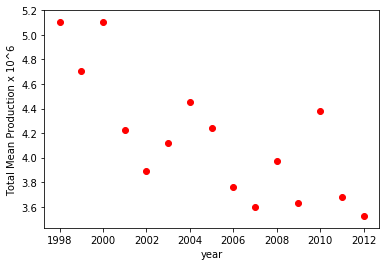

In [2]:
#Mean of total production by per year
production_per_year=df.groupby('year').totalprod.mean().reset_index()

#print(production_per_year.head())
production_per_year['totalprod']=production_per_year['totalprod']/(10 ** 6)
print(production_per_year.head(2))

# X=Year
x=production_per_year['year']

# Reshaping this into the right format
x_train=x.values.reshape(-1,1)


# y=totalprod
y=(production_per_year['totalprod'])

y_train=y.values.reshape(-1,1)

#plotting x_train vs y
plt.scatter(x_train,y_train,color='red')
plt.xlabel('year')
plt.ylabel('Total Mean Production x 10^6')
plt.show()

### Scikit-Learn 

The slope m= [-0.08830319]  , The intercept b= 181.20808310732986


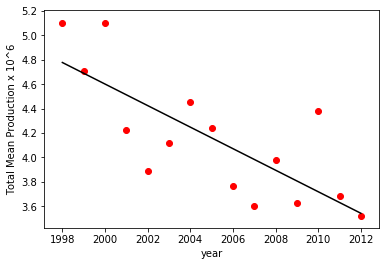

In [3]:
# The Linear Regression Model 
lr=linear_model.LinearRegression()
#fitting the data
lr.fit(x_train,y_train)
# Getting the slope and the intercept
m=lr.coef_[0]
b=lr.intercept_[0]
print('The slope m=',m,' , The intercept b=',b)
# The Predicted y values
y_predict=lr.predict(x_train)
#plotting the line
plt.plot(x_train,y_predict,color='black')
plt.scatter(x_train,y_train,color='red')
plt.xlabel('year')
plt.ylabel('Total Mean Production x 10^6')

# Showing both the plots
plt.show()

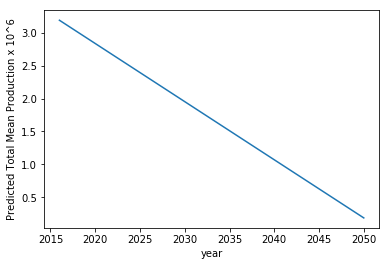

The predicted Mean Production for the year 2025 is = 2.3941250737563564  x 10^6 !!


In [4]:
# Testing 
x_future=np.array(range(2016,2051,1))
x_future=x_future.reshape(-1,1)
future_pred=lr.predict(x_future)

plt.plot(x_future,future_pred)
plt.xlabel('year')
plt.ylabel('Predicted Total Mean Production x 10^6')
plt.show()

print("The predicted Mean Production for the year 2025 is =",float(lr.predict([[2025]]))," x 10^6 !!" )